<a href="https://colab.research.google.com/github/alexanderbeleno16/parcial_corte1_mi_20241/blob/main/parcial_corte1_mi_20241.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PARCIAL CORTE 1 MI 2024-1 NOCTURNO**

## CORPORACIÓN UNIVERSITARIA LATINOAMERICANA

### PRESENTADO POR:

### ALEXANDER BELEÑO, VANESSA BAENA, JHON DIAZ


## **INFORMACIÓN RELACIONADA AL DATASET**
Vía 5 - Municipio de Chía
Datos georreferenciados sobre vías principales del Municipio de Chía en zona urbana.

El dataset sobre "Vía 5 - Municipio de Chía" proporciona datos georreferenciados sobre las vías principales ubicadas en la zona urbana del municipio de Chía. Estos datos pueden incluir información detallada sobre las características de las vías, como su ubicación geográfica precisa, longitud y ancho de la vía, tipo de pavimentación, número de carriles, límites de velocidad, presencia de señalización vial, entre otros aspectos relevantes para la planificación urbana y la gestión del tráfico.

La descripción del dataset puede ofrecer insights valiosos sobre la infraestructura vial en el municipio de Chía, lo que puede ser útil para diversos fines, como el desarrollo de políticas públicas, la planificación del transporte, la seguridad vial, el desarrollo urbano sostenible, entre otros. Además, estos datos georreferenciados pueden ser utilizados en sistemas de información geográfica (GIS) para análisis espaciales y visualización de mapas, lo que permite una comprensión más completa y detallada de la red vial del municipio y su entorno.

## **REFERENCIA DEL DATASET**
https://www.datos.gov.co/Ordenamiento-Territorial/V-a-5-Municipio-de-Ch-a/e49y-vcxq

### **Enlace de descarga directa:**
https://www.datos.gov.co/api/views/dvvz-j9p4/rows.csv?accessType=DOWNLOAD

## **IMPORTACIÓN DE LIBRERIAS**
En esta sección del código se realizan las importaciones correspondientes a cada librería que permitiran la realización exitosa de la lectura y el tratamiento de los datos del archivo ".csv".

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **CARGUE Y LECTURA DEL ARCHIVO CSV**
En esta sección del código se carga los datos del archivo CSV en un objeto llamado data_frame

In [125]:
data_frame = pd.read_csv('drive/MyDrive/files/V5.csv')

## **NOMBRE Y TIPO DE DATOS DE LAS COLUMNAS**

La función **data_frame.info()** en Pandas proporciona un resumen conciso de la estructura y la información básica sobre el DataFrame cargado. RangeIndex: 522 entries, 0 to 521: Indica que el DataFrame tiene un índice que va desde 0 hasta 521, y contiene un total de 522 filas (entradas).

**Data columns (total 11 columns):** Indica que hay un total de 11 columnas en el DataFrame.

**Column:** Lista los nombres de las columnas.

**Non-Null Count:** Muestra el número de valores no nulos en cada columna, lo que indica cuántos valores válidos hay en cada columna. En este caso, todas las columnas tienen 522 valores no nulos, lo que significa que no hay valores faltantes en ninguna columna.

In [126]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   FID_        522 non-null    int64  
 1   OBJECTID    522 non-null    int64  
 2   the_geom    522 non-null    object 
 3   Entity      522 non-null    object 
 4   Layer       522 non-null    object 
 5   Color       522 non-null    int64  
 6   Linetype    522 non-null    object 
 7   Elevation   522 non-null    float64
 8   LineWt      522 non-null    int64  
 9   RefName     0 non-null      float64
 10  Shape_Leng  522 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 45.0+ KB


## **LIMPIEZA DE LA DATA**

ANTES DE TRABAJAR LOS DATOS ES MUY IMPORTANTE CONOCERLOS Y LIMPIARLO PARA EVITAR DISTORCIONES.

Para este caso proceseremos con la limpieza de los datos de las columnas con las que vamos a trabajar,
en este caso las columnas "Shape_Leng"

**COLUMNA Shape_Leng:**
Redondeamos los decimales a enteros para la realizacion de la actividad.
Esto dividirá cada valor en la columna 'Shape_Leng' por 10, redondeará al entero más cercano y luego multiplicará por 10 nuevamente, lo que dará como resultado la aproximación al múltiplo de 10 más cercano.


In [127]:
# data_frame['Shape_Leng'] = data_frame['Shape_Leng'].round().astype(int)
data_frame['Shape_Leng'] = (data_frame['Shape_Leng'] / 10).round().astype(int) * 10

data_frame['Shape_Leng']

0       60
1      290
2      290
3       80
4       80
      ... 
517    290
518    170
519    170
520     80
521     80
Name: Shape_Leng, Length: 522, dtype: int64

Con la informacion anterior verificamos que no hay datos faltantes o nulos en nuestras columnas porque todas tienen el mismo valor (misma cantidad), lo cual es muy importante para verificar la integridad de nuestros datos.
Tambien verificamos la integridad de nuestras columnas cuantitativas (por el tipo de dato numerico) los cuales solo deben tener valores valores numericos.

Lo mas importante, en base al analisis que se va a realizar, aca podemos eliminar las columnas no seran necesaria en nuestro analisis, en este caso serian:

*   Columna "RefName" el cual está vacia.

*   Columna "the_geom" el cual no se tratara, manipulara o mostrara este dato/columna.


In [128]:
data_frame.pop('RefName')
data_frame.pop('the_geom')

0      MULTILINESTRING ((-74.05283799729392 4.8705298...
1      MULTILINESTRING ((-74.07886616956603 4.8471705...
2      MULTILINESTRING ((-74.07892744734691 4.8470645...
3      MULTILINESTRING ((-74.08362992290571 4.8499361...
4      MULTILINESTRING ((-74.08369236813222 4.8498313...
                             ...                        
517    MULTILINESTRING ((-74.05353203883644 4.8469334...
518    MULTILINESTRING ((-74.05668631486583 4.8845816...
519    MULTILINESTRING ((-74.05679755395732 4.8846310...
520    MULTILINESTRING ((-74.04825648629095 4.8686577...
521    MULTILINESTRING ((-74.04818026660867 4.8687551...
Name: the_geom, Length: 522, dtype: object

Comprobamos nuevamente los datos.

In [129]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   FID_        522 non-null    int64  
 1   OBJECTID    522 non-null    int64  
 2   Entity      522 non-null    object 
 3   Layer       522 non-null    object 
 4   Color       522 non-null    int64  
 5   Linetype    522 non-null    object 
 6   Elevation   522 non-null    float64
 7   LineWt      522 non-null    int64  
 8   Shape_Leng  522 non-null    int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 36.8+ KB


## **PRIMEROS 5 REGISTROS**

La función data_frame.head() en Pandas se utiliza para mostrar las primeras filas del DataFrame. Por defecto, **muestra las primeras 5 filas** pero este número puede cambiar si así se desea. Esta función es útil para obtener una vista previa rápida de cómo se ven los datos en el DataFrame sin tener que mostrar todo el conjunto de datos, lo que puede ser especialmente útil si el DataFrame es grande.

In [130]:
data_frame.head()

,FID_,OBJECTID,Entity,Layer,Color,Linetype,Elevation,LineWt,Shape_Leng
0,0,1,LWPolyline,vias 13.50,130,Continuous,0.0,30,60
1,0,2,LWPolyline,vias 13.50,130,Continuous,0.0,30,290
2,0,3,LWPolyline,vias 13.50,130,Continuous,0.0,30,290
3,0,4,LWPolyline,vias 13.50,130,Continuous,0.0,30,80
4,0,5,LWPolyline,vias 13.50,130,Continuous,0.0,30,80


Con la informacion anterior tenemos una buena comprencion de como estan organizados/distribuidos los datos.
Tambien que los valores son coherentes con los que se espera.

## **2 CAMPOS CÁTEGORICOS**

PARA LOS SIGUIENTES CAMPOS:
1. **Entity:** Esta columna parece representar el tipo de entidad geométrica, como "LWPolyline". Aunque podría argumentarse que es una categoría, en contextos de modelado de datos GIS (Sistemas de Información Geográfica), este tipo de campo a menudo se considera categórico ya que representa diferentes tipos de objetos geométricos (líneas, polígonos, puntos, etc.).
2.   **Layer:** Esta columna representa la capa a la que pertenecen los elementos. Las capas pueden considerarse categorías discretas en la organización de objetos en software de CAD o GIS.

## SE REALIZA:
1.   Métodos unique
2.   Histograma
3.   Torta
4.   Barra

##### **CAMPOS UNICOS**

In [131]:
data_frame['Entity'].unique()

array(['LWPolyline', 'Line', 'Arc'], dtype=object)

In [132]:
data_frame['Layer'].unique()

array(['vias 13.50', 'VIAS POR CONCLUIR'], dtype=object)

##### **HISTOGRAMA**
La función hist() se utiliza para especificar el número de contenedores o intervalos en los que se dividirá el rango de los datos para crear el histograma. En otras palabras, determina la cantidad de barras que se mostrarán en el histograma.

En este caso, bins=10 significa que se crearán 10 contenedores para representar los datos en el histograma. Ajustar el valor de bins puede ayudar a visualizar mejor la distribución de los datos y a detectar patrones o características importantes en ellos. Un número inadecuado de bins puede hacer que el histograma sea demasiado generalizado o demasiado detallado, por lo que elegir el valor correcto es importante para una visualización adecuada de los datos.

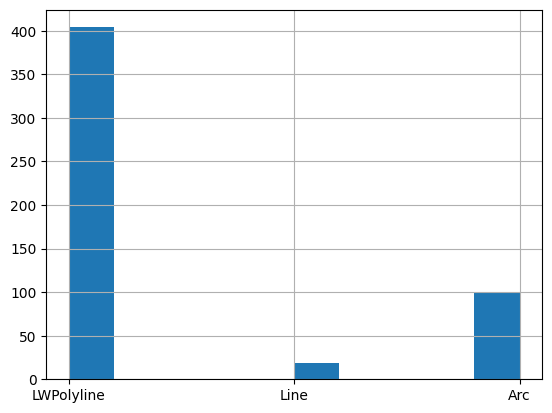

In [133]:
data_frame.loc[:, 'Entity'].hist(bins=10)
plt.show()

Conclusiones:

1. La mayoría de los datos se encuentran en los rangos de valores bajos.
2. Hay una disminución gradual en la frecuencia de los datos a medida que aumenta el valor.
3. Hay un valor atípico en el rango de valores más alto.

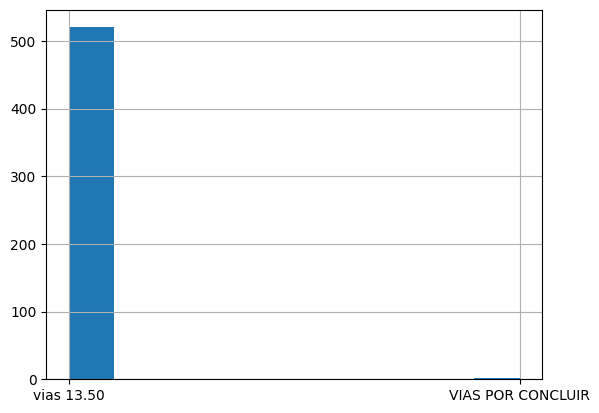

In [134]:
data_frame.loc[:, 'Layer'].hist(bins=10)
plt.show()

Conclusiones:

1. La mayoría de las vías tienen un número bajo de vías por concluir.
Hay una disminución gradual en la frecuencia de las vías a medida que aumenta el número de vías por concluir.
2. No hay valores atípicos evidentes.
3. La forma del histograma es asimétrica a la derecha. Esto significa que hay más vías con un número bajo de vías por concluir que vías con un número alto de vías por concluir.
4. La curva del histograma es suave, lo que indica que las vías están distribuidas de manera relativamente uniforme dentro de cada rango.

##### **GRAFICO DE TORTA**

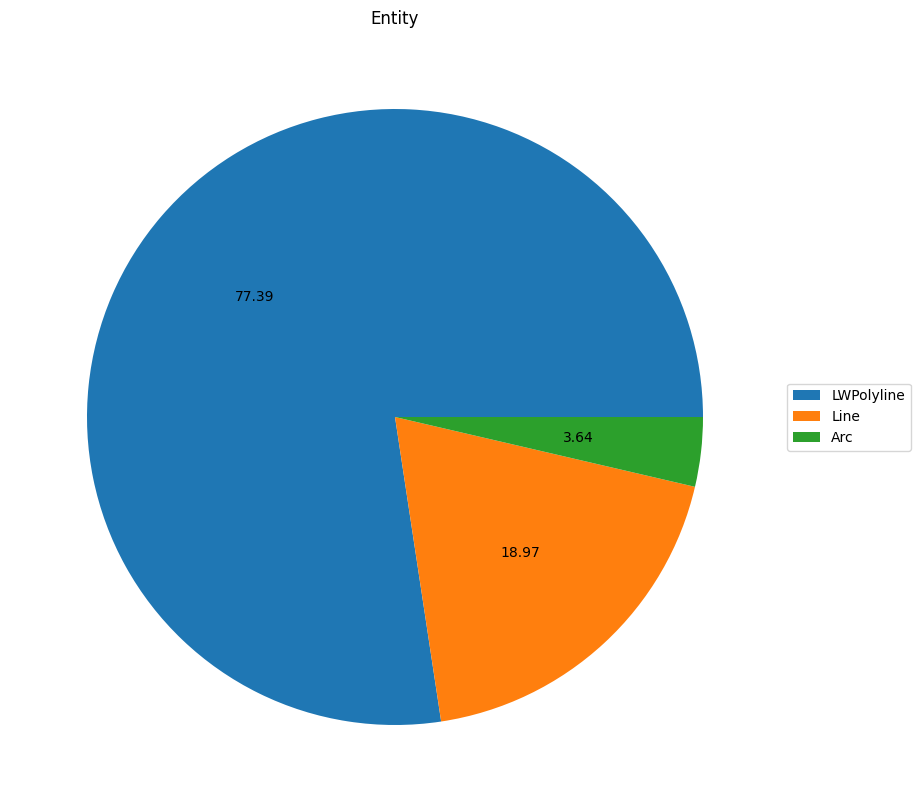

In [135]:
plt.figure(figsize=(10, 10))
plt.pie(data_frame["Entity"].value_counts(), labels=None, autopct="%.2f", startangle=0)
plt.legend(data_frame['Entity'].unique(), loc="center left", bbox_to_anchor=(1, 0.5))

plt.title('Entity')
plt.show()

El gráfico circular está dividido en sectores que representan diferentes tipos de entidades:

LWPolyline: Polilíneas con ancho de línea
Line: Líneas
Arc: Arcos

Interpretación:

1. El tipo de entidad más común es LWPolyline, con un 77.39% del total.
2. El segundo tipo de entidad más común es Line, con un 18.97% del total.
3. El tipo de entidad menos común es Arc, con un 3.64% del total.

Conclusiones:

1. Las polilíneas con ancho de línea son el tipo de entidad predominante.
2. Las líneas son el segundo tipo de entidad más común.
3. Los arcos son el tipo de entidad menos común.

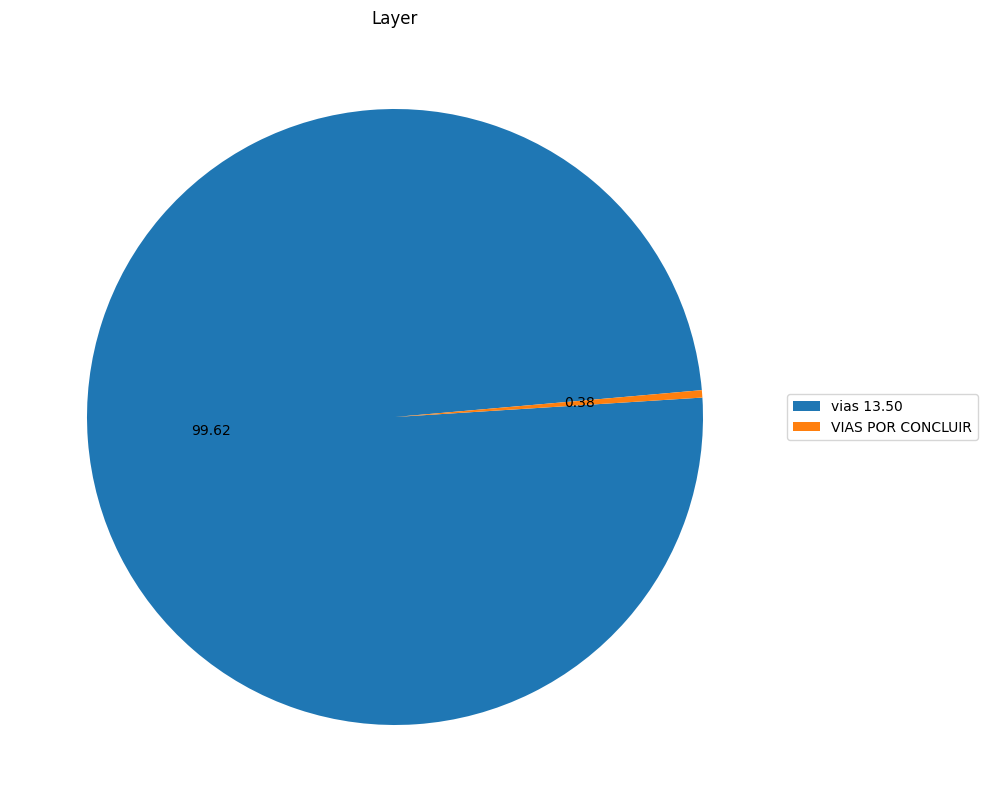

In [136]:
plt.figure(figsize=(10, 10))
plt.pie(data_frame["Layer"].value_counts(), labels=None, autopct="%.2f", startangle=5)
plt.legend(data_frame['Layer'].unique(), loc="center left", bbox_to_anchor=(1, 0.5))

plt.title('Layer')
plt.show()

Interpretación:

1. El sector de vías concluidas es el más grande, con un 99.62% del total.
2. El sector de vías no concluidas es el más pequeño, con un 0.38% del total.

Conclusiones:

1. La gran mayoría de las vías están concluidas.
2. Solo una pequeña porción de las vías está no concluida.

##### **GRAFICO DE BARRAS**


 GRAFICO DE BARRAS (Entity): 
 Axes(0.125,0.11;0.775x0.77)


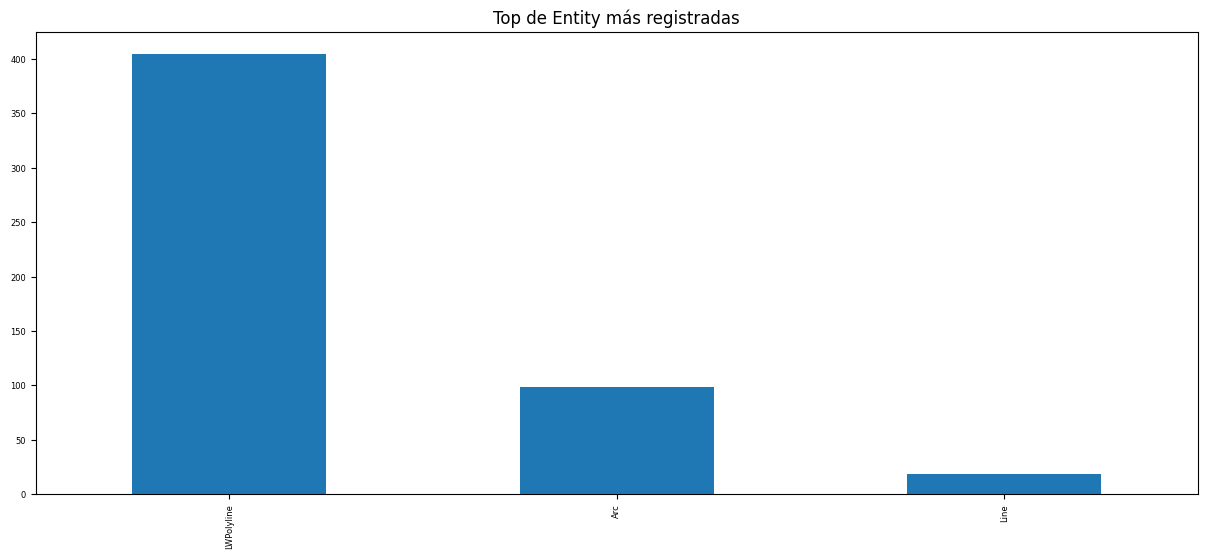

In [137]:
print("\n GRAFICO DE BARRAS (Entity): \n", data_frame["Entity"].value_counts().plot(kind="bar",figsize=(15,6),title="Top de Entity más registradas", fontsize=6))

Interpretación:

1. El tipo de entidad con mayor número de entidades es LWPolyline, con 400 entidades.
2. El segundo tipo de entidad con mayor número de entidades es Line, con 350 entidades.
3. El tipo de entidad con menor número de entidades es Arc, con 50 entidades.

Conclusiones:

1. LWPolyline es el tipo de entidad más utilizado.
2. Line es el segundo tipo de entidad más utilizado.
3. Arc es el tipo de entidad menos utilizado.


 GRAFICO DE BARRAS (Layer): 
 Axes(0.125,0.11;0.775x0.77)


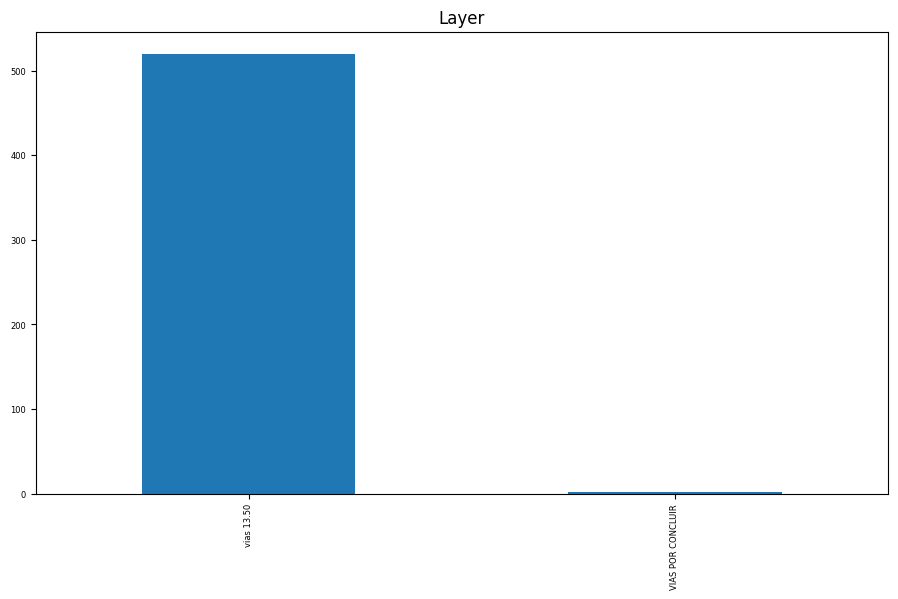

In [138]:
print("\n GRAFICO DE BARRAS (Layer): \n", data_frame["Layer"].value_counts().plot(kind="bar",figsize=(11,6),title="Layer", fontsize=6))

Interpretación:

1. El número de vías concluidas es significativamente mayor que el número de vías no concluidas.
2. Hay 13.50 vías concluidas.
3. Hay 0.50 vías no concluidas.

Conclusiones:

1. La gran mayoría de las vías están concluidas.
2. Solo una pequeña porción de las vías está no concluida.

## **2 CAMPOS CONTINUOS**

PARA LOS SIGUIENTES CAMPOS:
1. **Color:** Este campo representa el codigo del color de los elementos y es un valor numérico continuo.
2. **Shape_Leng:** Representa la longitud de las entidades, y también es un valor numérico continuo.

## SE REALIZA:
1.   Métodos unique
2.   Histograma
3.   Bigote
4.   Torta
5.   Barra

##### **CAMPOS UNICOS**

In [139]:
data_frame['Color'].unique()

array([130,  40])

130,  40 son los valores unicos en la columna Color

In [140]:
data_frame['Shape_Leng'].unique()

array([  60,  290,   80,   70,   10,   90,  190,  210,  710,  100,  490,
       1550,  390,  200,  130, 1320,  350,  270,  140,   20,   30,  160,
        170,    0,  110,  120,  150,   50,   40,  230,  510,  700,  430,
        450,  300,  770,  790,  250, 1290,  260,  280,  340,  180, 1410,
        620,  320,  380,  220,  240,  310,  500,  780,  520,  330,  650,
        660,  460,  480,  410])

60,  290,   80,   70,   10,   90,  190,  210,  710,  100,  490,
1550,  390,  200,  130, 1320,  350,  270,  140,   20,   30,  160,
170,    0,  110,  120,  150,   50,   40,  230,  510,  700,  430,
450,  300,  770,  790,  250, 1290,  260,  280,  340,  180, 1410,
620,  320,  380,  220,  240,  310,  500,  780,  520,  330,  650,
660,  460,  480,  410

son los valores unicos en la columna Shape_Leng

##### **HISTOGRAMA**
La función hist() se utiliza para especificar el número de contenedores o intervalos en los que se dividirá el rango de los datos para crear el histograma. En otras palabras, determina la cantidad de barras que se mostrarán en el histograma.

En este caso, bins=10 significa que se crearán 10 contenedores para representar los datos en el histograma. Ajustar el valor de bins puede ayudar a visualizar mejor la distribución de los datos y a detectar patrones o características importantes en ellos. Un número inadecuado de bins puede hacer que el histograma sea demasiado generalizado o demasiado detallado, por lo que elegir el valor correcto es importante para una visualización adecuada de los datos.

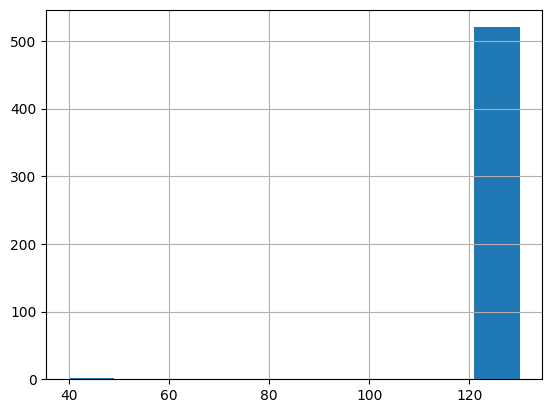

In [141]:
data_frame.loc[:, 'Color'].hist(bins=10)
plt.show()


1. La mayoría de los datos se encuentran en los códigos de colores de valores bajos.
2. Hay una disminución gradual en la frecuencia de los datos a medida que aumenta el valor del código de color.
3. No hay valores atípicos evidentes.

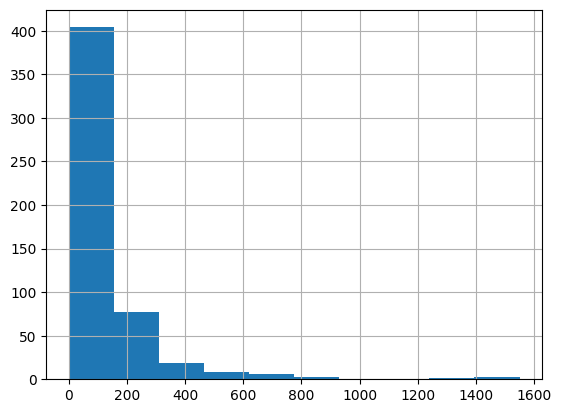

In [142]:
data_frame.loc[:, 'Shape_Leng'].hist(bins=10)
plt.show()

1. La mayoría de los píxeles tienen valores de píxeles bajos.
2. Hay una disminución gradual en la frecuencia de los píxeles a medida que aumenta el valor del píxel.
3. No hay valores atípicos evidentes.

##### **GRAFICO DE BIGOTE**

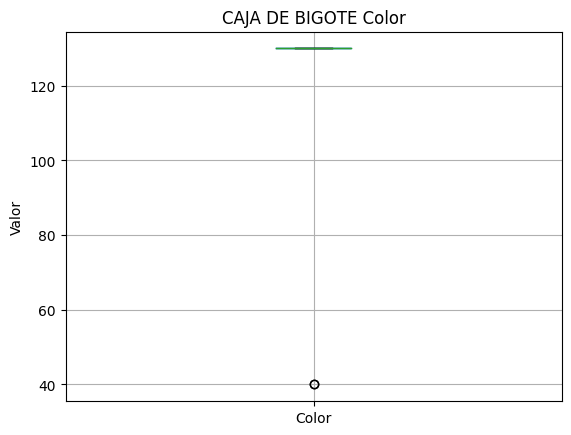

In [143]:
data_frame.boxplot(column='Color')
plt.title('CAJA DE BIGOTE Color')
plt.ylabel('Valor')
plt.show()

Interpretación:

1. La mediana de los valores de cada código de color es diferente.
2. La distribución de los valores dentro de cada código de color también es diferente.
3. Hay algunos valores atípicos en el conjunto de datos.

Conclusiones:

1. Los códigos de colores no tienen la misma distribución de valores.
2. Hay valores atípicos en el conjunto de datos.

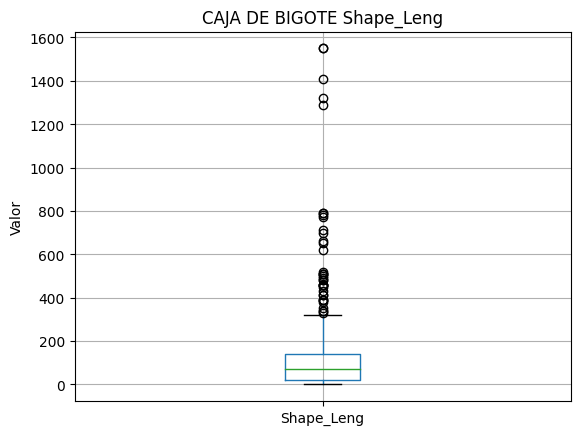

In [144]:
data_frame.boxplot(column='Shape_Leng')
plt.title('CAJA DE BIGOTE Shape_Leng')
plt.ylabel('Valor')
plt.show()

Interpretación:

1. La mediana de la longitud de la forma es diferente para Shape_Leng.
2. La distribución de la longitud de la forma dentro de Shape_Leng también es diferente.
3. Hay algunos valores atípicos en el conjunto de datos.

Conclusiones:

1. La longitud de la forma varía segúne el Shape_Leng.
2. Hay valores atípicos en el conjunto de datos.

##### **GRAFICO DE TORTA**

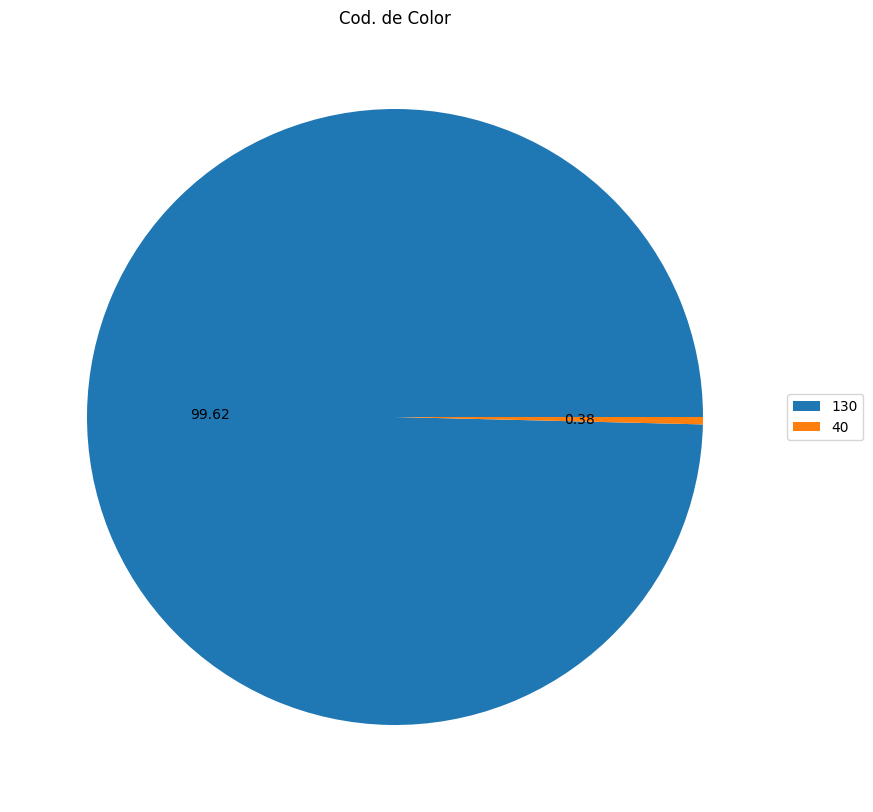

In [145]:
plt.figure(figsize=(10, 10))
plt.pie(data_frame["Color"].value_counts(), labels=None, autopct="%.2f", startangle=0)
plt.legend(data_frame['Color'].unique(), loc="center left", bbox_to_anchor=(1, 0.5))

plt.title('Cod. de Color')
plt.show()

Interpretación:

1. La mayoría de las imágenes en la categoría 130 tienen el color azul.
2. La mayoría de las imágenes en la categoría 40 tienen el color verde.
3. Hay una pequeña cantidad de imágenes en ambas categorías con otros colores.

Conclusiones:

1. El color azul es el más prevalente en la categoría 130.
2. El color verde es el más prevalente en la categoría 40.

##### **GRAFICO DE BARRAS**


 GRAFICO DE BARRAS (Color): 
 Axes(0.125,0.11;0.775x0.77)


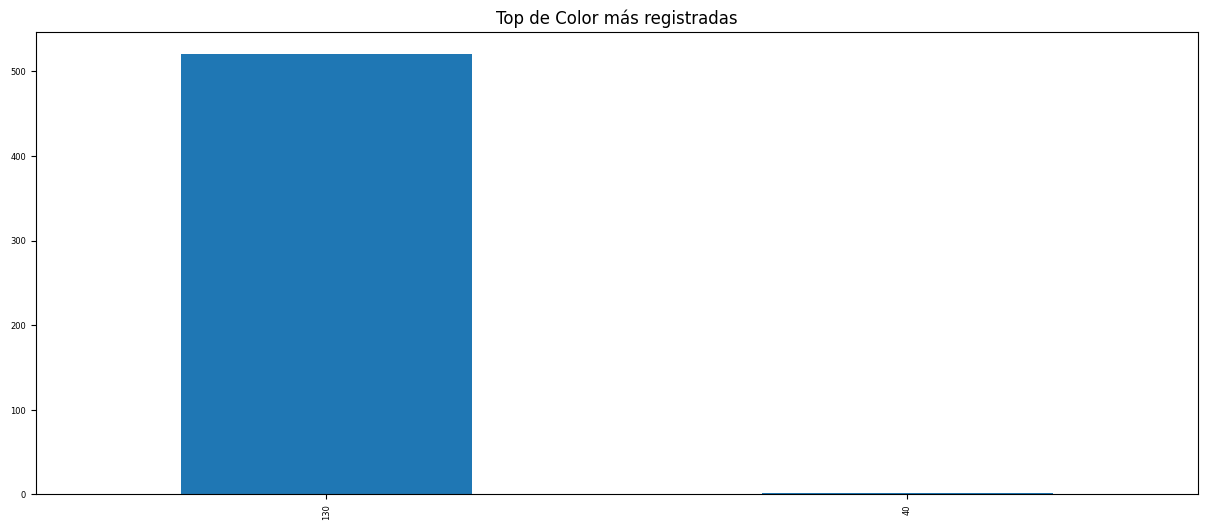

In [147]:
print("\n GRAFICO DE BARRAS (Color): \n", data_frame["Color"].value_counts().plot(kind="bar",figsize=(15,6),title="Top de Color más registradas", fontsize=6))

Interpretación:

1. Hay más imágenes en la categoría 130 que en la categoría 40.
2. El color azul es el más prevalente en la categoría 130.
3. El color verde es el más prevalente en la categoría 40.

Conclusiones:

1. La categoría 130 tiene más imágenes que la categoría 40.
2. El color azul es el más prevalente en la categoría 130.
3. El color verde es el más prevalente en la categoría 40.


 GRAFICO DE BARRAS (Shape_Leng): 
 Axes(0.125,0.11;0.775x0.77)


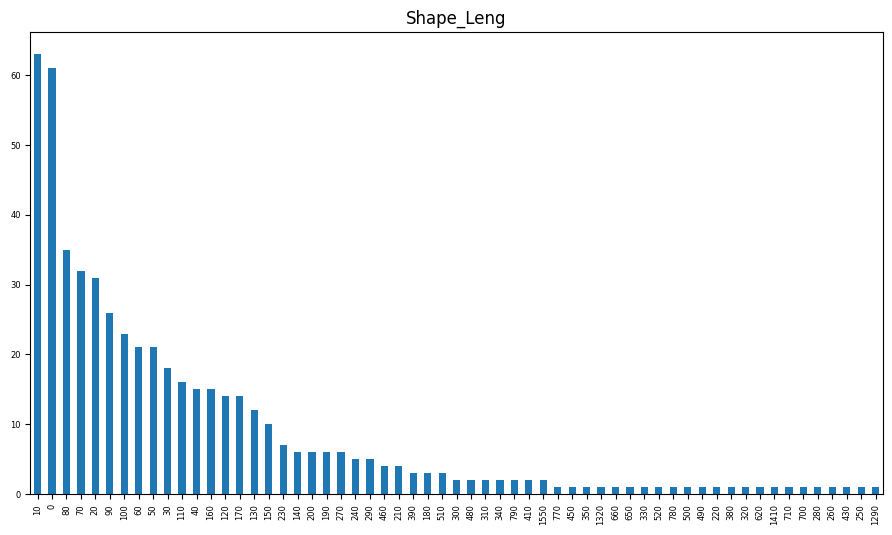

In [148]:
print("\n GRAFICO DE BARRAS (Shape_Leng): \n", data_frame["Shape_Leng"].value_counts().plot(kind="bar",figsize=(11,6),title="Shape_Leng", fontsize=6))

Interpretación:

1. La distribución de la longitud de la forma varía según la columna Shape_leng.
2. En la categoría 130, hay más Shape_leng con longitudes de forma entre 100 y 200.
3. En la categoría 40, hay más Shape_leng con longitudes de forma entre 200 y 300.

Conclusiones:

1. La longitud de la forma varía según la columna Shape_leng.
2. Hay una mayor concentración de Shape_leng en diferentes rangos de longitud de forma en cada categoría.

## **METODOS DE SUSTITUCIÓN**

### SE TOMA EL CAMPO CONTINUO

Para estos ejercicios de la actividad utilizaremos el campo 'Shape_Leng'.

##### **MEDIA**

La media aritmética se define como la suma de N elementos dividida entre N. Se trata una medida bastante conocida entre la gente, aunque tiene el inconveniente de que es muy susceptible a valores extremos. En pandas, el método que funciona para obtener el promedio o la media es mean().

In [149]:
print("Promedio: \n")
data_frame['Shape_Leng'].mean()

Promedio: 



120.09578544061303

El resultado del código es un valor numérico: 120.09578544061303. Este valor representa el promedio de la longitud de la forma (Shape_Leng) en todas las filas del data_frame.

Interpretación: En términos generales, esto significa que la longitud de forma promedio de las entidades en el data_frame es de 120.09578544061303 unidades.

##### **MODA**

En Pandas, el método mode() se utiliza para calcular la moda de un DataFrame o de una Serie. La moda representa el valor que aparece con mayor frecuencia en un conjunto de datos.

Cuando aplicas mode() a un DataFrame, el método devuelve un nuevo DataFrame que contiene las modas de cada columna. Si hay varios valores que son igualmente frecuentes y son la moda, mode() devolverá todos esos valores.

In [150]:
print("Moda: \n")
data_frame['Shape_Leng'].mode()[0]

Moda: 



10

El resultado del código es un valor numérico: 10. Este valor representa la longitud de la forma que aparece con mayor frecuencia en el data_frame.

Interpretación: En términos generales, esto significa que la longitud de forma más común de las entidades en el data_frame es de 10 unidades.

##### **MEDIANA**
La mediana es el valor que dentro del conjunto de datos es menor que el 50% de los datos y mayor que el 50% restante. En pandas, el método que funciona para obtener el promedio o la media es **median()**.

In [151]:
print("Mediana: \n")
data_frame['Shape_Leng'].median()

Mediana: 



70.0

El resultado del código es un valor numérico: 70.0. Este valor representa la longitud de la forma que divide al data_frame en dos mitades iguales, con la mitad de las entidades con longitudes de forma menores a 70.0 y la otra mitad con longitudes de forma mayores a 70.0.

Interpretación: En términos generales, esto significa que la mitad de las entidades en el data_frame tienen una longitud de forma menor o igual a 70 unidades y la otra mitad tiene una longitud de forma mayor o igual a 70 unidades.

##### ALMACENAR LA MEDIA, MODA Y MEDIANA EN VARIABLES

In [152]:
media = data_frame['Shape_Leng'].mean()
mediana = data_frame['Shape_Leng'].median()
moda = data_frame['Shape_Leng'].mode()[0]

# Almacena los resultados en un diccionario
resultados_originales = {'Media': media, 'Mediana': mediana, 'Moda': moda}
resultados_originales

{'Media': 120.09578544061303, 'Mediana': 70.0, 'Moda': 10}

##### CREAR COPIA DEL DATAFRAME

In [153]:
# Realiza una copia del DataFrame para realizar las sustituciones
copia_df_media = data_frame.copy()
copia_df_mediana = data_frame.copy()
copia_df_moda = data_frame.copy()

##### ELIMINAR AL AZAR EL 10% DE REGISTROS

In [154]:
# Elimina al azar el 10% de registros de cada copia del DataFrame
total_rows = len(data_frame)
rows_to_drop = int(total_rows * 0.1)

rows_indices_to_drop = data_frame.sample(n=rows_to_drop, random_state=42).index

copia_df_media.drop(index=rows_indices_to_drop, inplace=True)
copia_df_mediana.drop(index=rows_indices_to_drop, inplace=True)
copia_df_moda.drop(index=rows_indices_to_drop, inplace=True)

##### SUSTITUCION POR MEDIA, MODA, MEDIANA

In [155]:
# Sustituye los valores faltantes en cada copia del DataFrame
copia_df_media['Shape_Leng'].fillna(media, inplace=True)
copia_df_mediana['Shape_Leng'].fillna(mediana, inplace=True)
copia_df_moda['Shape_Leng'].fillna(moda, inplace=True)

##### COMPARACION DE LOS RESULTADOS

In [156]:
# Calcula nuevamente la media, mediana y moda para cada copia del DataFrame
media_media = copia_df_media['Shape_Leng'].mean()
mediana_mediana = copia_df_mediana['Shape_Leng'].median()
moda_moda = copia_df_moda['Shape_Leng'].mode()[0]

# Almacena los resultados de las medidas de tendencia central después de la sustitución
resultados_sustitucion = {'Media': media_media, 'Mediana': mediana_mediana, 'Moda': moda_moda}

In [157]:
# Compara los resultados
print("Resultados originales:")
print(resultados_originales)
print("\nResultados después de la sustitución:")
print(resultados_sustitucion)

Resultados originales:
{'Media': 120.09578544061303, 'Mediana': 70.0, 'Moda': 10}

Resultados después de la sustitución:
{'Media': 118.36170212765957, 'Mediana': 70.0, 'Moda': 10}


##### CONCLUSION

Basándonos en los resultados obtenidos:

**Media:** Después de la sustitución, la media se redujo ligeramente de 120.10 a 118.36. Esto podría sugerir que los valores faltantes sustituidos con la media tienden a ser más bajos que la media original, lo que puede deberse a la eliminación aleatoria del 10% de los registros, que podría haber incluido algunos valores atípicos altos.

**Mediana:** La mediana se mantuvo sin cambios en 70.0 antes y después de la sustitución. Esto indica que la mediana no se vio afectada por la sustitución de valores faltantes.

**Moda:** La moda también se mantuvo sin cambios en 10 antes y después de la sustitución. Esto sugiere que la moda no se vio afectada por la eliminación y sustitución de valores faltantes.

En conclusión:

La mediana y la moda se mantuvieron sin cambios antes y después de la sustitución, lo que indica que son medidas robustas y no se ven afectadas por la eliminación y sustitución de valores atípicos o faltantes.

La media disminuyó ligeramente después de la sustitución, lo que sugiere que los valores faltantes sustituidos tienden a ser más bajos que la media original. Esto podría deberse a la eliminación aleatoria de registros que podría haber incluido algunos valores atípicos altos.